# Population Distribution
A marketing firm wants to launch a promotional campaign in different regions of the country. So, in order to do that, they need to understand which areas they should focus their resources in order to cover the entire region. We are provided with the population data based on different locations along with the demographics. The objective is to segregate the regions into different groups so that the marketing team can plan their resources accordingly. So we have to apply classification techniques in order to segregate the regions into different clusters which will help the marketing team.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
data = pd.read_csv("Population_Data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Region              38 non-null     object
 1   Office Location Id  38 non-null     int64 
 2   Indians             38 non-null     object
 3   Foreigners          38 non-null     object
 4   Indian_Male         38 non-null     object
 5   Indian_Female       38 non-null     object
 6   Foreigners_Male     38 non-null     object
 7   Foreigners_Female   38 non-null     object
 8   Total Population    38 non-null     object
dtypes: int64(1), object(8)
memory usage: 2.8+ KB


In [3]:
data.head()

,Region,Office Location Id,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Total Population
0,Region 31,1,"6,43,596","28,83,782","4,40,445","2,03,151","27,63,718","72,515","35,27,378"
1,Region 17,9,"3,19,933","15,01,899","2,13,477","1,06,456","14,49,303","27,671",1821832
2,Region 12,4,"1,94,379","6,50,744","1,61,803","32,576","6,31,660","10,652",845123
3,Region 22,15,"1,07,360","4,70,708","85,343","22,017","4,50,267","6,389",578068
4,Region 23,13,"55,351","3,29,980","31,796","23,555","3,25,105","3,684",385331


# Basic Data Preprocessing

Since the values are seperated by commas; they are object datatype and not numeric. Scikit library deals with only numeric datatype and thus we need to convert them.


In [4]:
numeric = ["Indians","Foreigners",
           "Indian_Male","Indian_Female",
           "Foreigners_Female",
           'Foreigners_Male',"Total Population"]

In [5]:
#Function to remove comma from the numeric data
def cleaner(z):
  return z.replace(',','')

In [6]:
cleaner('26,000')

'26000'

In [7]:
for i in data[numeric]:
    data[i] = data[i].apply(cleaner)

In [8]:
data.head()

,Region,Office Location Id,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Total Population
0,Region 31,1,643596,2883782,440445,203151,2763718,72515,3527378
1,Region 17,9,319933,1501899,213477,106456,1449303,27671,1821832
2,Region 12,4,194379,650744,161803,32576,631660,10652,845123
3,Region 22,15,107360,470708,85343,22017,450267,6389,578068
4,Region 23,13,55351,329980,31796,23555,325105,3684,385331


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Region              38 non-null     object
 1   Office Location Id  38 non-null     int64 
 2   Indians             38 non-null     object
 3   Foreigners          38 non-null     object
 4   Indian_Male         38 non-null     object
 5   Indian_Female       38 non-null     object
 6   Foreigners_Male     38 non-null     object
 7   Foreigners_Female   38 non-null     object
 8   Total Population    38 non-null     object
dtypes: int64(1), object(8)
memory usage: 2.8+ KB


In [10]:
# Converting numerical columns to numeric datatype
data[numeric] = data[numeric].apply(pd.to_numeric)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Region              38 non-null     object
 1   Office Location Id  38 non-null     int64 
 2   Indians             38 non-null     int64 
 3   Foreigners          38 non-null     int64 
 4   Indian_Male         38 non-null     int64 
 5   Indian_Female       38 non-null     int64 
 6   Foreigners_Male     38 non-null     int64 
 7   Foreigners_Female   38 non-null     int64 
 8   Total Population    38 non-null     int64 
dtypes: int64(8), object(1)
memory usage: 2.8+ KB


# CHECK DATA INTEGRITY
1. verify : Indian + Foreigner population = Total Population

In [11]:
data[['Indians','Foreigners']].sum().sum() - data['Total Population'].sum()

0

2. Verify : Indian(male+female) +Foreigner(male+female) = Total population

In [12]:
data[['Indian_Male','Indian_Female',"Foreigners_Male",'Foreigners_Female']].sum().sum() - data['Total Population'].sum()

-112859

1. -ve value means that total population is greater than population of male and female collectively.
2. This means that some people do not identify themselves as male or female.

In [13]:
# Storing the difference as new column "others"
MF_sum = data['Indian_Male'] + data['Indian_Female'] + data["Foreigners_Male"] + data['Foreigners_Female']
data['other'] = data['Total Population'] - MF_sum
data.head()

,Region,Office Location Id,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Total Population,other
0,Region 31,1,643596,2883782,440445,203151,2763718,72515,3527378,47549
1,Region 17,9,319933,1501899,213477,106456,1449303,27671,1821832,24925
2,Region 12,4,194379,650744,161803,32576,631660,10652,845123,8432
3,Region 22,15,107360,470708,85343,22017,450267,6389,578068,14052
4,Region 23,13,55351,329980,31796,23555,325105,3684,385331,1191


In [14]:
# Verify : Indian(male+female) = Indian population
data[['Indian_Male','Indian_Female']].sum().sum() - data['Indians'].sum()

0

In [15]:
# Verify : Indian(male+female) = Indian population
data[['Foreigners_Male','Foreigners_Female']].sum().sum() - data['Foreigners'].sum()

-112859

In [16]:
# Storing the difference as new column "others"
MF_sum = data['Foreigners_Male'] + data['Foreigners_Female']
data['Foreigners_other'] = data['Foreigners'] - MF_sum
data.head()

,Region,Office Location Id,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Total Population,other,Foreigners_other
0,Region 31,1,643596,2883782,440445,203151,2763718,72515,3527378,47549,47549
1,Region 17,9,319933,1501899,213477,106456,1449303,27671,1821832,24925,24925
2,Region 12,4,194379,650744,161803,32576,631660,10652,845123,8432,8432
3,Region 22,15,107360,470708,85343,22017,450267,6389,578068,14052,14052
4,Region 23,13,55351,329980,31796,23555,325105,3684,385331,1191,1191


In [17]:
#checking the unique office location ids.
data['Region'].nunique(),data['Office Location Id'].nunique()

(38, 38)

1. both 'Region' and 'Office Location Id' contain 38 values which is equal to number of rows in the dataset. Each region has unique office location id. That means there is no similarity in the data wrt and each datapoint is unique. That does not contribute anything uesful to model and we won't consider them while clustering.
2. We will drop the total population features because other feature like Indian_Male, Indian_Female, Foreigners_Male, Foreigners_Female provide same info at granular level.

In [18]:
#drop office location ids
data1 = data.drop(columns = ['Region',"Office Location Id"])
data1.head()

,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Total Population,other,Foreigners_other
0,643596,2883782,440445,203151,2763718,72515,3527378,47549,47549
1,319933,1501899,213477,106456,1449303,27671,1821832,24925,24925
2,194379,650744,161803,32576,631660,10652,845123,8432,8432
3,107360,470708,85343,22017,450267,6389,578068,14052,14052
4,55351,329980,31796,23555,325105,3684,385331,1191,1191


# Scaling the Data.
We will scale the data using three different method and see which performs better with no of clusters set to 3

# 1. NORMALIZE THE DATA 
---------------data_N------------------

In [19]:
dataX = data1.drop(columns=['Total Population'])

In [20]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()
columns = dataX.columns
data_N = norm.fit_transform(dataX)

data_N = pd.DataFrame(data_N, columns = columns)
data_N.head()

,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,other,Foreigners_other
0,0.157900,0.707507,0.108059,0.049841,0.678050,0.017791,0.011666,0.011666
1,0.150526,0.706633,0.100439,0.050087,0.681887,0.013019,0.011727,0.011727
2,0.206303,0.690664,0.171729,0.034574,0.670409,0.011305,0.008949,0.008949
3,0.161114,0.706386,0.128073,0.033041,0.675711,0.009588,0.021088,0.021088
4,0.118217,0.704761,0.067909,0.050308,0.694349,0.007868,0.002544,0.002544


# 2. Using Percentage 
Define each column as the percentage of the total population

In [21]:
def percentage_converter(data, total, columns):
    #expresses the other columns as percentage of the total column
    
    for i in columns:
        data[i] = data[i]/data['Total Population']
        
    return data.drop(columns=['Total Population'])

data2 = percentage_converter(data1,'Total Population', data1.drop(columns=['Total Population']).columns)
data2.head()

,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,other,Foreigners_other
0,0.182457,0.817543,0.124865,0.057593,0.783505,0.020558,0.013480,0.013480
1,0.175611,0.824389,0.117177,0.058433,0.795520,0.015189,0.013681,0.013681
2,0.230001,0.769999,0.191455,0.038546,0.747418,0.012604,0.009977,0.009977
3,0.185722,0.814278,0.147635,0.038087,0.778917,0.011052,0.024309,0.024309
4,0.143645,0.856355,0.082516,0.061129,0.843703,0.009561,0.003091,0.003091


# 3. Standard Scaler
------- data_S -------------

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_S = scaler.fit_transform(dataX)
data_S = pd.DataFrame(data_S)
data_S.head()

,0,1,2,3,4,5,6,7
0,5.210141,5.236361,5.129794,5.300876,5.225687,5.616170,5.117551,5.117551
1,2.386435,2.518660,2.271904,2.600394,2.531599,1.935556,2.520377,2.520377
2,1.291074,0.844724,1.621246,0.537085,0.855719,0.538706,0.627026,0.627026
3,0.531902,0.490654,0.658493,0.242195,0.483927,0.188816,1.272186,1.272186
4,0.078164,0.213889,-0.015749,0.285148,0.227389,-0.033200,-0.204221,-0.204221


# K-Means - Trials
We will check inertia value for each dataset scaled by different technique

In [23]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(data_N)
kmeans.inertia_

0.018224339449502563

In [24]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data2)
kmeans.inertia_

0.03680489565686007

In [25]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data_S)
kmeans.inertia_

22.02736120600702

We can clearly see that NORMALIZED data gives least inertia value. Thus we will use Normalized dataset - data_N

**************************************************************

Steps we just performed to scale dataset with different techniques is not compulsory. It is just for refernce that which scaling technique can give better results. There are various factors which can change the inertia value.

# Plotting elbow curve for K-means

In [26]:
from sklearn.cluster import KMeans
SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster)
    kmeans.fit(data_N)
    SSE.append(kmeans.inertia_)

C:\Users\kolik\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\kolik\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kolik\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\kolik\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated i

In [27]:
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE': SSE})

Text(0, 0.5, 'Inertia')

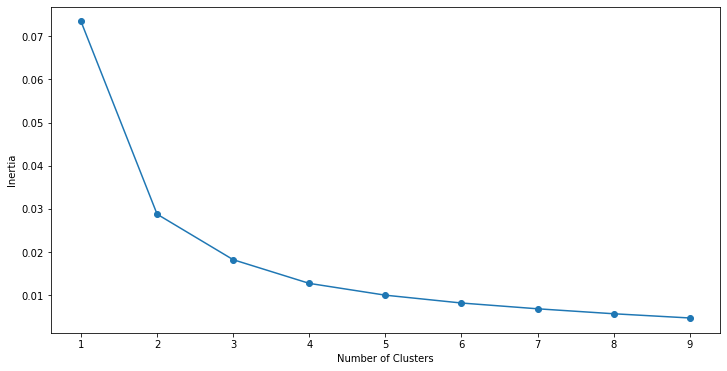

In [28]:
plt.figure(figsize = (12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

In [29]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(data_N)
pred = kmeans.predict(data_N)

In [30]:
kmeans.inertia_

0.028773315264153724

In [31]:
data_N['cluster'] = pred

In [36]:
def seg(str_x, str_y, clusters):
  x = []
  y = []

  for i in range(clusters):
    x.append(data1[str_x][data_N['cluster']==i])
    y.append(data1[str_y][data_N['cluster']==i])
  
  return x,y

def plot_clusters(str_x, str_y, clusters):
  plt.figure(figsize = (5,5), dpi = 120)
  
  x,y = seg(str_x, str_y, clusters)

  for i in range(clusters):
    plt.scatter(x[i], y[i], label = 'cluster{}'.format(i))
  
  plt.xlabel(str_x)
  plt.ylabel(str_y)
  plt.title(str(str_x+" Vs "+str_y))
  plt.legend()
  return "Boom"

'Boom'

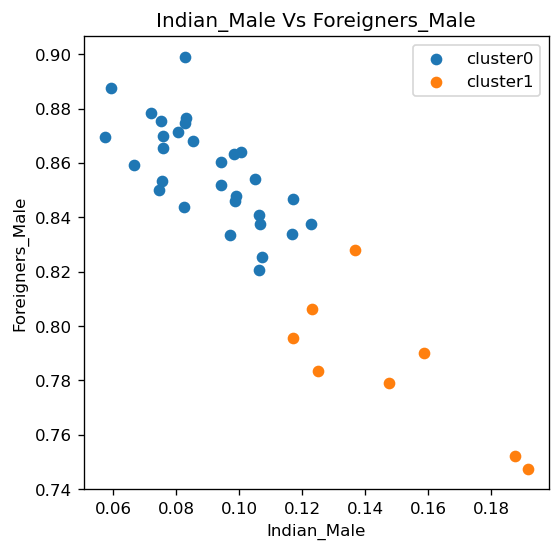

In [37]:
plot_clusters('Indian_Male', 'Foreigners_Male',2)

In [38]:
data_N.head()

,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,other,Foreigners_other,cluster
0,0.157900,0.707507,0.108059,0.049841,0.678050,0.017791,0.011666,0.011666,1
1,0.150526,0.706633,0.100439,0.050087,0.681887,0.013019,0.011727,0.011727,1
2,0.206303,0.690664,0.171729,0.034574,0.670409,0.011305,0.008949,0.008949,1
3,0.161114,0.706386,0.128073,0.033041,0.675711,0.009588,0.021088,0.021088,1
4,0.118217,0.704761,0.067909,0.050308,0.694349,0.007868,0.002544,0.002544,0


KeyError: 'cluster'

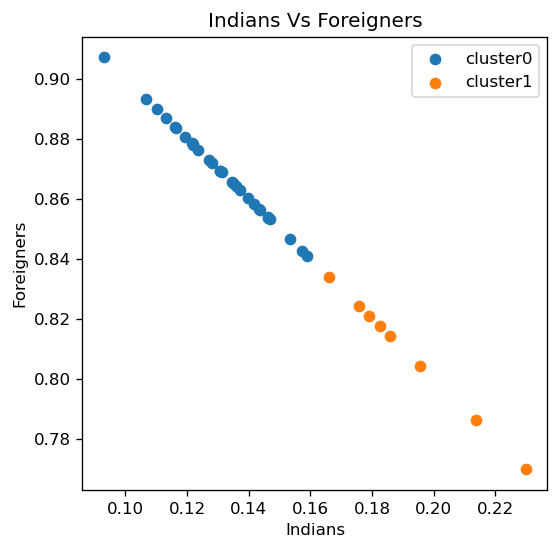

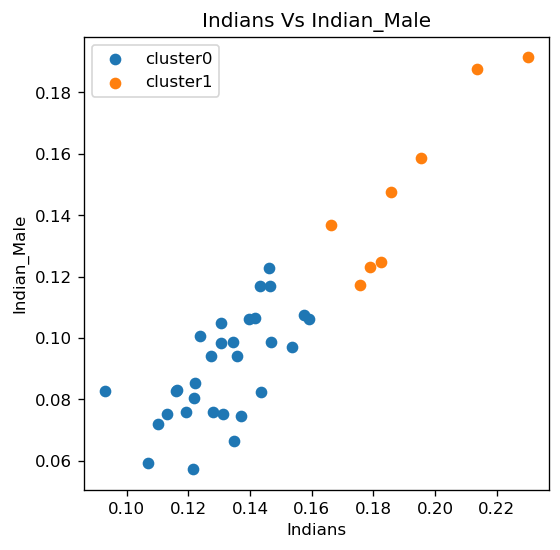

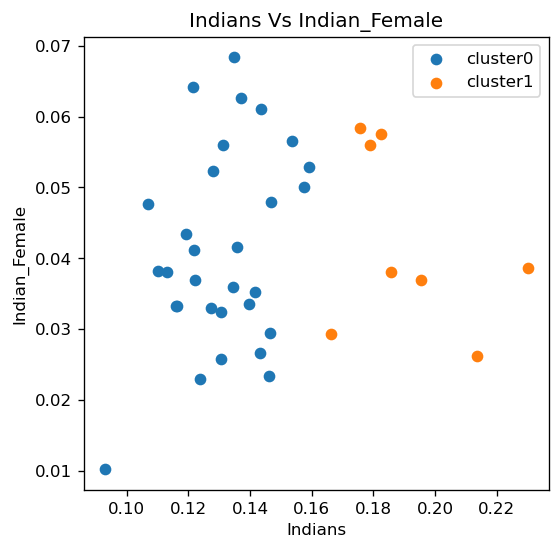

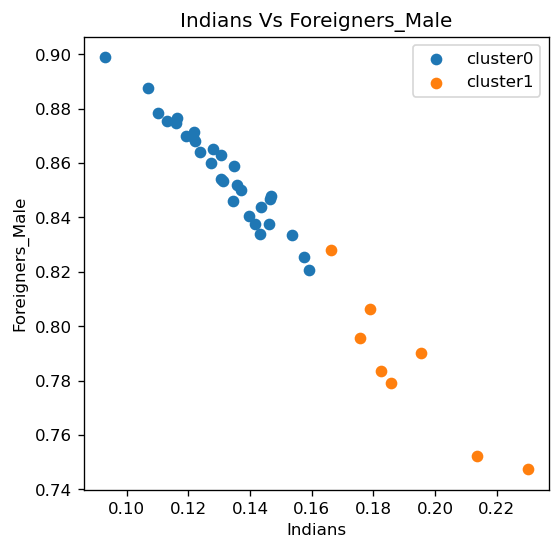

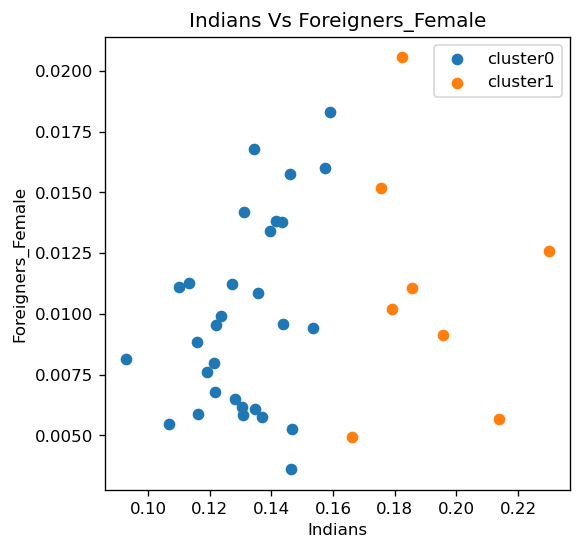

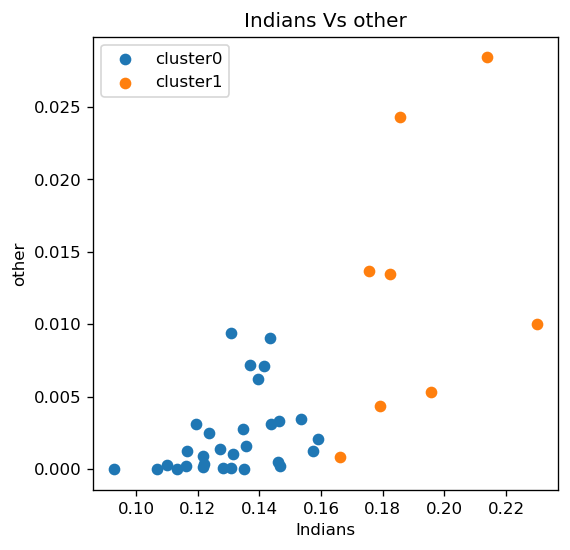

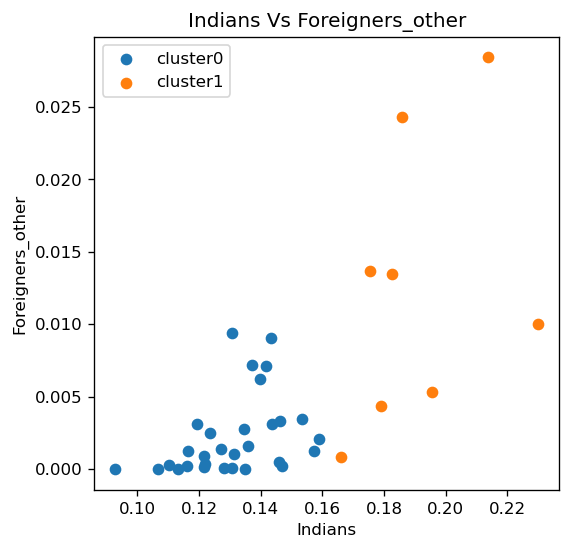

<Figure size 600x600 with 0 Axes>

In [40]:
for x in data_N:
    for y in data_N:
        if x != y:
            plot_clusters(x, y, 2)

In [41]:
data_N.head(5)

,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,other,Foreigners_other,cluster
0,0.157900,0.707507,0.108059,0.049841,0.678050,0.017791,0.011666,0.011666,1
1,0.150526,0.706633,0.100439,0.050087,0.681887,0.013019,0.011727,0.011727,1
2,0.206303,0.690664,0.171729,0.034574,0.670409,0.011305,0.008949,0.008949,1
3,0.161114,0.706386,0.128073,0.033041,0.675711,0.009588,0.021088,0.021088,1
4,0.118217,0.704761,0.067909,0.050308,0.694349,0.007868,0.002544,0.002544,0


In [42]:
data.head(5)

,Region,Office Location Id,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Total Population,other,Foreigners_other
0,Region 31,1,643596,2883782,440445,203151,2763718,72515,3527378,47549,47549
1,Region 17,9,319933,1501899,213477,106456,1449303,27671,1821832,24925,24925
2,Region 12,4,194379,650744,161803,32576,631660,10652,845123,8432,8432
3,Region 22,15,107360,470708,85343,22017,450267,6389,578068,14052,14052
4,Region 23,13,55351,329980,31796,23555,325105,3684,385331,1191,1191


# Prediction

In [45]:
new_row = [643596, 2883782, 440445, 203151, 2763718, 72515,47549,47549 ]
X_new = np.array(new_row).reshape(1,-1)
pred = kmeans.predict(X_new)

In [46]:
pred

array([1])